<a href="https://colab.research.google.com/github/NguyenThiHongLinh/ML2023/blob/main/Lab_4_20130306_NguyenThiHongLinh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML


#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
data1=datasets.load_iris()
x=data1.data
y=data1.target
x
y

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=4, stratify=y)
x_test
y_train
y_test

array([1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0,
       0, 1, 0, 0, 1, 1])

In [ ]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train) 

LogisticRegression(random_state=0)

In [ ]:
y_predict=classifier.predict(x_test)
y_predict

array([1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0,
       0, 1, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_predict) 
cm

array([[17,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 17]])

Accuracy :  0.98


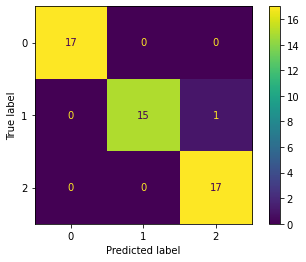

In [ ]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import ConfusionMatrixDisplay
print ("Accuracy : ", accuracy_score(y_test, y_predict))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [ ]:
mnist=datasets.load_digits()
X=mnist.data
Y=mnist.target
X
Y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y,test_size=0.5, random_state=2)

In [ ]:
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, Y_train) 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
Y_predict=classifier.predict(X_test)
Y_predict

In [ ]:
CM = confusion_matrix(Y_test, Y_predict) 
CM

array([[92,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 87,  0,  0,  0,  0,  0,  0,  3,  2],
       [ 0,  1, 79,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 93,  0,  1,  0,  4,  1,  0],
       [ 0,  0,  0,  0, 83,  0,  0,  0,  0,  4],
       [ 1,  0,  0,  0,  1, 93,  0,  0,  0,  4],
       [ 0,  1,  0,  0,  0,  1, 95,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 84,  0,  2],
       [ 0,  5,  0,  0,  0,  1,  0,  0, 73,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  2, 82]])

Accuracy :  0.9577308120133482


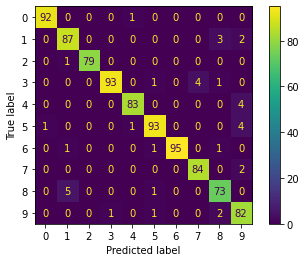

In [ ]:
print ("Accuracy : ", accuracy_score(Y_test, Y_predict))
ConfusionMatrixDisplay.from_predictions(Y_test, Y_predict)

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
k_range=range(1,30,2)
data3=datasets.load_iris()
x1=data3.data
y1=data3.target

In [ ]:
x1_train,x2_test,y1_train,y2_test=train_test_split(x1, y1,test_size=0.5, random_state=2)

In [ ]:
model.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y1_predict=model.predict(x2_test)

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [ ]:
# code

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [ ]:
# code

#Finally,
Save a copy in your Github. Remember renaming the notebook.